In [82]:
from urllib.request import urlopen, Request
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [83]:
# County Populations
u = "https://static.usafacts.org/public/data/covid-19/covid_county_population_usafacts.csv"
data = urlopen(Request(u, headers={'User-Agent': 'Mozilla'}))
pops = pd.read_csv(data)

In [84]:
# u = "https://maps.bryantx.gov/server/rest/services/BrazosCo/COVID_DATA/MapServer/2/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=reportedDate%20asc&resultOffset=0&resultRecordCount=1000"
# data = urlopen(Request(u, headers={'User-Agent': 'Mozilla'}))
# data_j = json.loads(data.read())

In [85]:
# new_daily = [{'reportedDate':k['attributes']['reportedDate'], 'dailyCases':k['attributes']['dailyCases']} for k in data_j['features']]

In [126]:
# US Data by County
u = "https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv"
data_us = urlopen(Request(u, headers={'User-Agent': 'Mozilla'}))
# data_us.read().decode('utf-8')
data_us = pd.read_csv(data_us)

In [127]:
pops_t = pops.transpose()
pops_t.columns = pops_t.iloc[1]+'_'+pops_t.iloc[2]
# pops_t.loc['population']
pops_t2 = pops_t.loc['population']


t = data_us.transpose()
t.columns = t.iloc[1]+'_'+t.iloc[2]

t_totalCases = t[[
    'Brazos County_TX',
    'Palo Pinto County_TX',
    'Parker County_TX',
    'Jack County_TX',
    'Wise County_TX',
    'El Paso County_TX',
    'Polk County_TX',
    'Tyler County_TX',
#     'Tarrant County_TX',
#     'Dallas County_TX',
#     'Travis County_TX'
]][4:]
t_totalCases.columns = pd.MultiIndex.from_product([["totalCases"], t_totalCases.columns])

t_dailyNew = pd.DataFrame(t_totalCases['totalCases'] - t_totalCases['totalCases'].shift(1))
t_dailyNew = t_dailyNew.div(pops_t2[t_dailyNew.columns]).mul(1000)
t_dailyNew.columns = pd.MultiIndex.from_product([["dailyNew"], t_dailyNew.columns])

t_weeklyAvg_dailyNew = t_dailyNew.rolling(window=7)['dailyNew'].mean()
t_weeklyAvg_dailyNew.columns = pd.MultiIndex.from_product([['dailyNew_weekAvg'], t_weeklyAvg_dailyNew.columns])

t_all = pd.concat([t_totalCases, t_dailyNew, t_weeklyAvg_dailyNew], axis=1)

<AxesSubplot:title={'center':'New Daily Cases per 1000 Population [7-Day Rolling Average]'}>

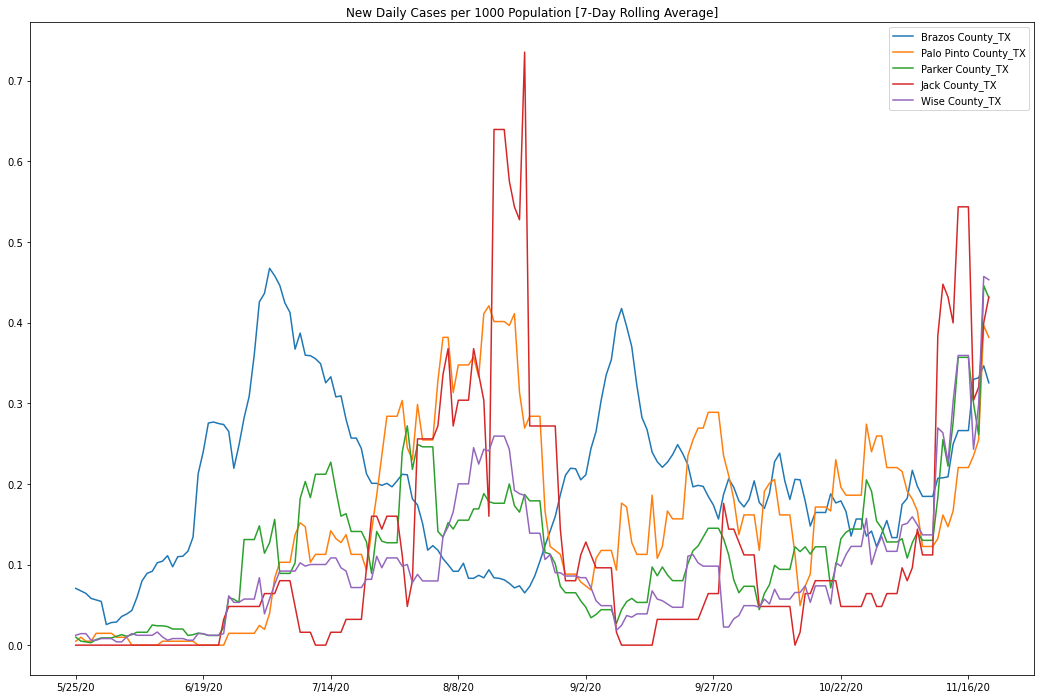

In [128]:
t_all['dailyNew_weekAvg'][-180:].plot(figsize=(22, 16), title="New Daily Cases per 1000 Population [7-Day Rolling Average]") # 7-day window average of new cases
# t_all['dailyNew'][-180:].plot(figsize=(18, 12))

In [129]:
t_all.tail(14)

totalCases                                        \
         Brazos County_TX Palo Pinto County_TX Parker County_TX   
11/7/20              7974                  770             2658   
11/8/20              7974                  770             2658   
11/9/20              7974                  770             2658   
11/10/20             8146                  789             2776   
11/11/20             8189                  798             2853   
11/12/20             8247                  798             2853   
11/13/20             8342                  804             2934   
11/14/20             8401                  815             3015   
11/15/20             8401                  815             3015   
11/16/20             8401                  815             3015   
11/17/20             8675                  837             3076   
11/18/20             8721                  850             3114   
11/19/20             8803                  879             3299   
11/20/20             8864                  882             3365   

                                               dailyNew                       \
         Jack County_TX Wise County_TX Brazos County_TX Palo Pinto County_TX   
11/7/20             162           1032         0.139609                    0   
11/8/20             162           1032                0                    0   
11/9/20             162           1032                0                    0   
11/10/20            182           1130           0.7504              0.65093   
11/11/20            186           1133           0.1876             0.308335   
11/12/20            186           1133         0.253042                    0   
11/13/20            187           1180         0.414465             0.205557   
11/14/20            196           1208         0.257405             0.376854   
11/15/20            196           1208                0                    0   
11/16/20            196           1208                0                    0   
11/17/20            201           1249          1.19541             0.753709   
11/18/20            206           1279         0.200688             0.445373   
11/19/20            211           1357         0.357749             0.993525   
11/20/20            214           1402          0.26613             0.102778   

                                                        dailyNew_weekAvg  \
         Parker County_TX Jack County_TX Wise County_TX Brazos County_TX   
11/7/20                 0              0              0         0.184484   
11/8/20                 0              0              0         0.184484   
11/9/20                 0              0              0         0.184484   
11/10/20         0.825879        2.23839        1.40032         0.206921   
11/11/20         0.538921       0.447678      0.0428669         0.207544   
11/12/20                0              0              0         0.208791   
11/13/20         0.566917       0.111919       0.671582         0.249302   
11/14/20         0.566917        1.00727       0.400091         0.266130   
11/15/20                0              0              0         0.266130   
11/16/20                0              0              0         0.266130   
11/17/20         0.426938       0.559597       0.585848         0.329702   
11/18/20         0.265961       0.559597       0.428669         0.331572   
11/19/20          1.29481       0.559597        1.11454         0.346530   
11/20/20         0.461933       0.335758       0.643004         0.325340   

                                                                              
         Palo Pinto County_TX Parker County_TX Jack County_TX Wise County_TX  
11/7/20              0.122355         0.129981       0.111919       0.136766  
11/8/20              0.122355         0.129981       0.111919       0.136766  
11/9/20              0.122355         0.129981       0.111919       0.136766  
11/10/20             0.132144         0.182973   